## 簡介
各種基本操作，主要使用numpy

In [36]:
import numpy as np
import matplotlib as mp
import pandas as pd

## 1.1 顯示變數
 - who 得到所有變數清單(jupyter 底下功能, 並且需要獨立使用)
 - whos 得到所有變數清單與型態(jupyter 底下功能, 並且需要獨立使用)
 - print 顯示變數
 - dir() 顯示在目前scope底下的所有變數list
 - global() 顯示在全域底下的所有變數dict
 - locals() 顯示在局域底下的所有變數dict
不過好像沒有找到類似cat 的函數，可以整合輸出，不過可以透過print做結構化輸出

In [2]:
a = 1 
b = '123'

In [3]:
whos

Variable   Type      Data/Info
------------------------------
a          int       1
b          str       123
mp         module    <module 'matplotlib' from<...>/matplotlib/__init__.py'>
np         module    <module 'numpy' from '/us<...>kages/numpy/__init__.py'>


In [4]:
print("%d"%a)

1


## 1.2 設定變數
 - 安心用等號
 - 可以透過list 設定變數

In [5]:
def g(a,b):
    return [a,b]
a,b = g(1,2)

In [6]:
whos

Variable   Type        Data/Info
--------------------------------
a          int         1
b          int         2
g          function    <function g at 0x10e1e4c80>
mp         module      <module 'matplotlib' from<...>/matplotlib/__init__.py'>
np         module      <module 'numpy' from '/us<...>kages/numpy/__init__.py'>


## ?? 整合繪圖於jupyter
請直接在指令列內打入
```
%matplotlib inline
```
https://ipython.org/ipython-doc/3/notebook/notebook.html

In [7]:
%matplotlib inline

## 1.3 刪除變數
- 在物件內建議使用 self.var = None
- 在一般情況下使用 del variable
細節可以參考[此連結](https://stackoverflow.com/questions/8237647/clear-variable-in-python)
- 全部清除可以嘗試使用 ```%reset```

In [8]:
del a

In [9]:
whos

Variable   Type        Data/Info
--------------------------------
b          int         2
g          function    <function g at 0x10e1e4c80>
mp         module      <module 'matplotlib' from<...>/matplotlib/__init__.py'>
np         module      <module 'numpy' from '/us<...>kages/numpy/__init__.py'>


In [10]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


In [11]:
whos

Variable   Type        Data/Info
--------------------------------
b          int         2
g          function    <function g at 0x10e1e4c80>
mp         module      <module 'matplotlib' from<...>/matplotlib/__init__.py'>
np         module      <module 'numpy' from '/us<...>kages/numpy/__init__.py'>


## 1.4 產生向量
- 這裡直接使用numpy, 不產用python內建array, 因為之後要直接進行相關資料操作並非系統變數抄作
- 此處向量定義是搜集一系列有序可隨機直接存取並且**型態一致**的變數集
- 此處向量可以產生高維度的向量

### 產生方法
1. [np.array](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.array.html) 丟個python的array進入
2. np.arange 可以產生序列向量
3. [np.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) 可以產生指定數量的0 向量
4. [np.linspace](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.linspace.html) 可以產生等差數列的向量
5. np.indices 可以產生高維度的unit vector

### 注意事項
- 建議檢查每個array的變數型態 dtype, 確保精准度如預期所示 np.float64為最高精準度
- 除了自己設定之外，也可以讀去HD

In [12]:
np.array([1,2,3])

array([1, 2, 3])

In [13]:
np.array([1,2,3],ndmin=2)

array([[1, 2, 3]])

In [14]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
np.arange(10,dtype=np.float64)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [16]:
np.zeros((2,2))

array([[ 0.,  0.],
       [ 0.,  0.]])

In [17]:
np.zeros(3,dtype=np.int)

array([0, 0, 0])

In [18]:
np.linspace(1,2,num= 5)

array([ 1.  ,  1.25,  1.5 ,  1.75,  2.  ])

In [19]:
np.linspace(1,2,num= 5,endpoint=False)

array([ 1. ,  1.2,  1.4,  1.6,  1.8])

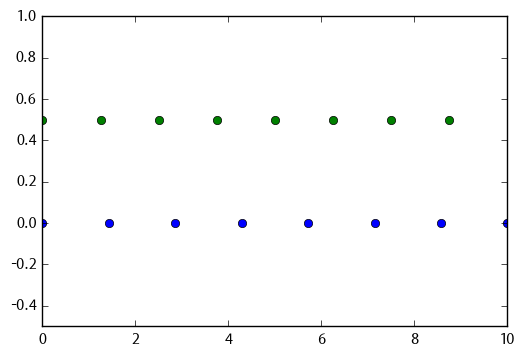

In [20]:
#畫張圖看看
import matplotlib.pyplot as plt
N = 8
y = np.zeros(N)
x1 = np.linspace(0, 10, N, endpoint=True)
x2 = np.linspace(0, 10, N, endpoint=False)
plt.plot(x1, y, 'o')
plt.plot(x2, y + 0.5, 'o')
plt.ylim([-0.5, 1])
plt.show()

## 1.5 基礎統計量
### numpy
- mean
- median
- [std](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.std.html)
- var
- [corrcoef](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html)
- [cov](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.cov.html)
如果想要忽略nan的話，可以採用帶有nan開頭版本
- [naamean](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.nanmean.html#numpy.nanmean)

### pandas
- mean
- std
- corr
- [cov](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.cov.html)

### 補充
#### cov - $ E[XY] - E[X]E[Y] $
主要是為了計算距離平均數的差異
#### cor 
主要是用來表達兩個數字的相關係數，但會因為計算個數$N$的多寡，而值的大小難以有相依比較性，越小的$N$越容易表現出很高的相關係數，相反的，月大的$N$則相關係數絕對值越小

In [21]:
a = np.array([[1, 2], [3, 4]])

In [22]:
np.std(a,axis=0)

array([ 1.,  1.])

In [23]:
np.std(a,axis=1)

array([ 0.5,  0.5])

In [24]:
np.mean(a)

2.5

In [26]:
np.mean(a,axis=0)

array([ 2.,  3.])

In [27]:
a = np.array([[1, np.nan], [3, 4]])

In [28]:
np.mean(a)

nan

In [29]:
np.nanmean(a)

2.6666666666666665

In [30]:
x = [-2.1, -1,  4.3]
y = [3,  1.1,  0.12]
X = np.vstack((x,y))

In [32]:
X

array([[-2.1 , -1.  ,  4.3 ],
       [ 3.  ,  1.1 ,  0.12]])

In [33]:
np.cov(X)

array([[ 11.71      ,  -4.286     ],
       [ -4.286     ,   2.14413333]])

In [35]:
np.corrcoef(X)

array([[ 1.        , -0.85535781],
       [-0.85535781,  1.        ]])

In [38]:
df = pd.DataFrame(data={"a":[3,2,1],"b":[1,2,3]})

In [39]:
df.mean()

a    2.0
b    2.0
dtype: float64

In [40]:
df.corr()

,a,b
a,1.0,-1.0
b,-1.0,1.0


In [41]:
df.std()

a    1.0
b    1.0
dtype: float64

In [42]:
df.cov()

,a,b
a,1.0,-1.0
b,-1.0,1.0


## 1.6 產生序列
- [np.arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)
- np.linspace

### 還缺日期序列的處理

In [43]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [48]:
np.linspace(1,5,num=6)

array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ])

In [49]:
np.arange(10,2,-3)

array([10,  7,  4])

In [50]:
np.repeat(4,3)

array([4, 4, 4])

In [51]:
np.repeat(np.arange(3),3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

## 1.7 比較向量

In [56]:
np.pi

3.141592653589793

In [58]:
np.arange(2,6,step=1) == np.pi

array([False, False, False, False], dtype=bool)

In [59]:
np.arange(2,6,step=1) > np.pi

array([False, False,  True,  True], dtype=bool)

In [60]:
np.any(np.arange(2,6,step=1) > np.pi)

True

In [62]:
np.all(np.arange(2,6,step=1) > np.pi)

False

## 1.8 選擇向量

In [66]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [65]:
a[1]

1

In [68]:
a[2:4]

array([2, 3])

In [71]:
a[a<5]

array([0, 1, 2, 3, 4])

In [72]:
a[a%2 == 0]

array([0, 2, 4, 6, 8])

In [73]:
a[ a > np.median(a)]

array([5, 6, 7, 8, 9])

In [78]:
#取出大於95% 或者是 小於5%, 必須先用小括號
a[ (a > np.percentile(a,95)) | (a < np.percentile(a,5))]

array([0, 9])

In [80]:
#取出超過一個標準差
a[ np.abs(a - np.mean(a)) > 1* np.std(a)]

array([0, 1, 8, 9])

In [82]:
#取出不是nan
a[~np.isnan(a)]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [98]:
#具有名字的向量處理
l = ['a'+str(x) for x in range(10)]
df = pd.DataFrame(data=a).transpose()
df.columns = l
df[['a0','a9']]

,a0,a9
0,0,9


## 1.9 執行向量運算

In [106]:
a = np.arange(10)
b = np.linspace(2,11,num=10)

### 兩個等長向量

In [107]:
a + b

array([  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.])

In [108]:
a / b

array([ 0.        ,  0.33333333,  0.5       ,  0.6       ,  0.66666667,
        0.71428571,  0.75      ,  0.77777778,  0.8       ,  0.81818182])

In [111]:
np.power(a,b)

array([  0.00000000e+00,   1.00000000e+00,   1.60000000e+01,
         2.43000000e+02,   4.09600000e+03,   7.81250000e+04,
         1.67961600e+06,   4.03536070e+07,   1.07374182e+09,
         3.13810596e+10])

### 純量 與 向量

In [115]:
a + 2

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [116]:
np.power(2,a)

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512])

### 不等長向量
無法使用，因為沒有循環原則，不能像R偷吃步

## 2.10 運算子執行順序
需要去找一下資料
//TODO

## 2.11 定義函數
太基本了，不多說

In [136]:
def a():
    return 1

## 2.12 直接讀入script
```
%load file_path
```